In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving stock.csv to stock.csv


In [ ]:
data=pd.read_csv('stock.csv')

In [ ]:

data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
data.shape

(1989, 7)

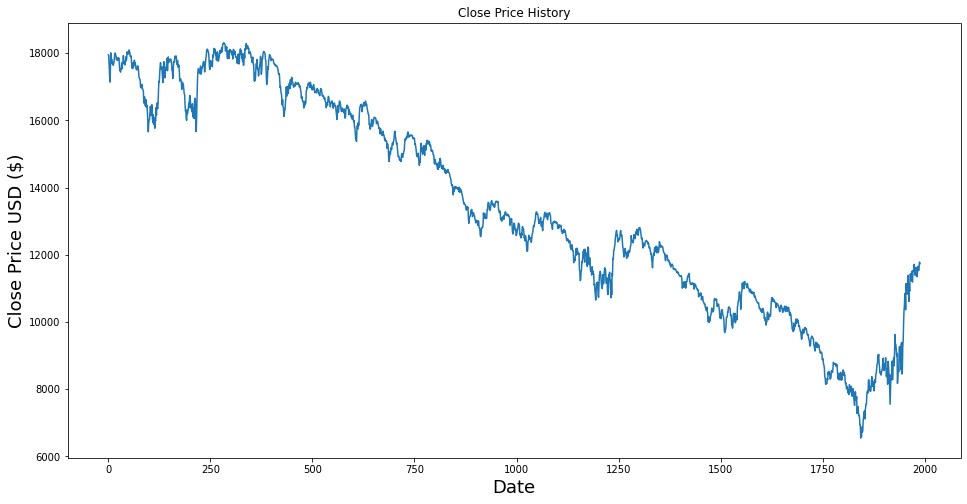

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data1 = data.filter(['Close'])

In [ ]:
dataset = data1.values

In [ ]:
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1592

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.96914484],
       [0.96749772],
       [0.9474974 ],
       ...,
       [0.43308732],
       [0.44497647],
       [0.4408942 ]])

In [ ]:
train_data = scaled_data[0:training_data_len  , : ]

In [ ]:
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1532, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0745
Epoch 2/20
1532/1532 [==============================] - 2s 2ms/step - loss: 0.0040
Epoch 3/20
1532/1532 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 4/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.5664e-04
Epoch 5/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.3713e-04
Epoch 6/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.4125e-04
Epoch 7/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.2368e-04
Epoch 8/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.2329e-04
Epoch 9/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.2072e-04
Epoch 10/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.2429e-04
Epoch 11/20
1532/1532 [==============================] - 2s 2ms/step - loss: 5.1892e-04
Epoch 12/20
1532/1532 [==============================

In [ ]:

test_data = scaled_data[training_data_len - 60: , : ]

In [ ]:
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

359.7220748399324

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


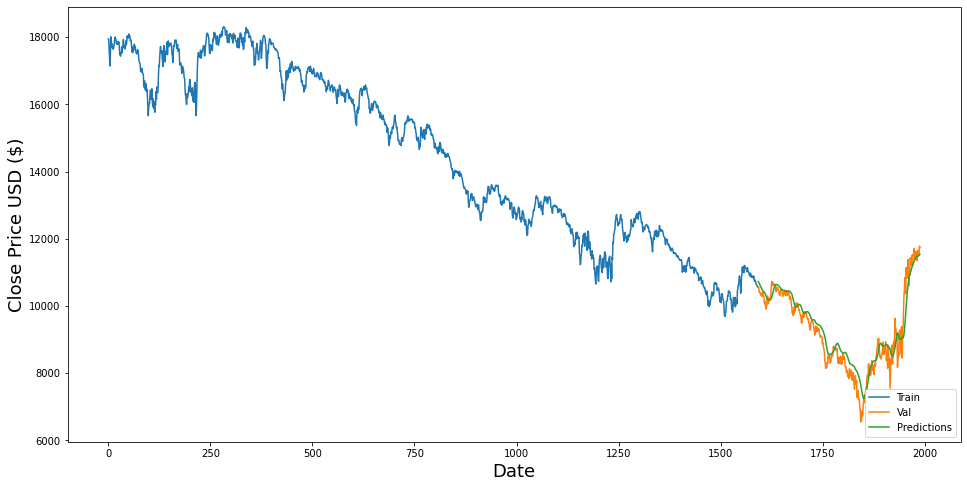

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid


,Date,Open,High,Low,Close,Volume,Adj Close,Predictions
1592,2010-03-08,10563.780273,10587.740234,10542.389648,10552.519531,171780000,10552.519531,10729.500977
1593,2010-03-05,10445.129883,10571.940430,10445.049805,10566.200195,184270000,10566.200195,10705.996094
1594,2010-03-04,10396.530273,10452.379883,10390.860352,10444.139648,165740000,10444.139648,10684.985352
1595,2010-03-03,10406.280273,10469.540039,10376.580078,10396.759766,183290000,10396.759766,10660.691406
1596,2010-03-02,10404.160156,10456.919922,10389.429688,10405.980469,217180000,10405.980469,10633.166992
...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,11484.640625
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,11496.194336
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,11506.021484
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,11519.835938


In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving RedditNews.csv to RedditNews.csv


In [ ]:
import pandas as pd

In [ ]:
d=pd.read_csv('RedditNews.csv')

In [ ]:
d.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [ ]:
d=d.groupby('Date')['News'].apply(' '.join).reset_index()
d.head()

,Date,News
0,2008-06-08,b'Nim Chimpsky: The tragedy of the chimp who t...
1,2008-06-09,"b'United States quits Human Rights Council' b""..."
2,2008-06-10,"b'Oil shortage a myth, says industry insider' ..."
3,2008-06-11,b'BBC uncovers lost Iraq billions' b'War Crimi...
4,2008-06-12,"b'Did US attack Pakistan last night? ""Pakistan..."


In [ ]:
df=data.merge(d,on='Date')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,News
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,Jamaica proposes marijuana dispensers for tour...
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In Istanbul Yemeni former...
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ..."
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...


In [ ]:
df.shape

(1989, 8)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import PorterStemmer
sno = nltk.stem.SnowballStemmer('english') 

In [ ]:
import re
import string 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [ ]:
df['News'] = df['News'].apply(cleanpunc)

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
tokenizer = RegexpTokenizer("[a-zA-Z]+")
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data = df.values

In [ ]:
data[0]

array(['2016-07-01', 17924.240234, 18002.380859, 17916.910156,
       17949.369141, 82160000, 17949.369141,
       'A 117-year-old woman in Mexico City finally received her birth certificate  and died a few hours later  Trinidad Alvarez Lira had waited years for proof that she had been born in 1898  IMF chief backs Athens as permanent Olympic host The president of France says if Brexit won  so can Donald Trump British Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime  100+ Nobel laureates urge Greenpeace to stop opposing GMOs Brazil: Huge spike in number of police killings in Rio ahead of Olympics Austrias highest court annuls presidential election narrowly lost by right-wing candidate  Facebook wins privacy case  can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or not Switzerland denies Muslim girls citizenship after they refuse to

In [ ]:
len1=training_data_len - 60
sent_train = data[:training_data_len,7]
sent_test = data[len1:,7]

print (sent_train.shape, sent_test.shape)
sent_train[0]

(1592,) (457,)


'A 117-year-old woman in Mexico City finally received her birth certificate  and died a few hours later  Trinidad Alvarez Lira had waited years for proof that she had been born in 1898  IMF chief backs Athens as permanent Olympic host The president of France says if Brexit won  so can Donald Trump British Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime  100+ Nobel laureates urge Greenpeace to stop opposing GMOs Brazil: Huge spike in number of police killings in Rio ahead of Olympics Austrias highest court annuls presidential election narrowly lost by right-wing candidate  Facebook wins privacy case  can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or not Switzerland denies Muslim girls citizenship after they refuse to swim with boys at school: The 12- and 14-year-old will no longer be considered for naturalised citizenship because

In [ ]:
print(sent_train)

['A 117-year-old woman in Mexico City finally received her birth certificate  and died a few hours later  Trinidad Alvarez Lira had waited years for proof that she had been born in 1898  IMF chief backs Athens as permanent Olympic host The president of France says if Brexit won  so can Donald Trump British Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime  100+ Nobel laureates urge Greenpeace to stop opposing GMOs Brazil: Huge spike in number of police killings in Rio ahead of Olympics Austrias highest court annuls presidential election narrowly lost by right-wing candidate  Facebook wins privacy case  can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or not Switzerland denies Muslim girls citizenship after they refuse to swim with boys at school: The 12- and 14-year-old will no longer be considered for naturalised citizenship becaus

In [ ]:
for ix in range(sent_train.shape[0]):
    sent_train[ix] = tokenizer.tokenize(sent_train[ix])
    sent_train[ix] = [lemmatizer.lemmatize(i) for i in sent_train[ix]]
    
for ix in range(60,sent_test.shape[0]):
    print(sent_test[ix])
    sent_test[ix] = tokenizer.tokenize(sent_test[ix])
    sent_test[ix] = [lemmatizer.lemmatize(i) for i in sent_test[ix]]

bSoldier throws back grenade b Nigeria  Over five-hundred Christians  mostly women and children  are hacked to death by Muslim raiders with machetes in a night-time attack on their village  The killers yelled Allah Akbar  as they chopped  bGermany Is Tired of Paying Europes Bills bIsrael approves 1600 homes in occupied East Jerusalem homes - just as peace talks start  whilst the US vice president is visiting  following on from the 100+ new homes in the occupied West Bank   No doubt it will again be the fault of the Palestinians the peace process fails bEurope bars Wall Street banks from government bond sales  bSeven people have been arrested in the Irish Republic over an alleged plot to kill a Swedish cartoonist for depicting the Prophet Muhammad bA dozen previously unknown shipwrecks  some of them believed to be up to 1 000 years old  have been discovered in the Baltic Sea bBrazil slaps trade sanctions on US over illegal US subsidies for cotton bPopes brother Georg Ratzinger linked to

In [ ]:
from tqdm import tqdm

In [ ]:
unique_words = set()
len_max = 0

for sent in tqdm(sent_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|██████████| 1592/1592 [00:00<00:00, 13114.87it/s]

37204
676


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
tokenizer_keras = Tokenizer(num_words=len(list(unique_words)))
tokenizer_keras.fit_on_texts(list(sent_train))
sent_train = tokenizer_keras.texts_to_sequences(sent_train)
sent_test = tokenizer_keras.texts_to_sequences(sent_test)

In [ ]:
sent_train = sequence.pad_sequences(sent_train, maxlen=len_max)
sent_test = sequence.pad_sequences(sent_test, maxlen=len_max)
print(sent_train.shape,sent_test.shape)

(1592, 676) (457, 676)


In [ ]:
embeddings_index = dict()

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-03 13:58:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-03 13:58:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-03 13:58:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
f = open('./glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
print(len(unique_words))

37204


In [ ]:
vocab_size=len(list(unique_words))
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer_keras.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Embedding, Concatenate
from keras.models import Model,load_model
import keras

In [ ]:
input1 = Input(shape=(x_train.shape[1],1))
lstm1 = LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))(input1)
lstm2 = LSTM(units=50, return_sequences=False)(lstm1)
price_feat = Dense(units=25)(lstm2)

input2 = Input(shape=(len_max,))
emb = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=len_max)(input2)
lstm3 = LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)(emb)
lstm4 = LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False)(lstm3)
text_feat = Dense(100,activation='relu')(lstm4)

merged = Concatenate(axis=1)([price_feat, text_feat])
dense1 = Dense(2, input_dim=2, activation=keras.activations.sigmoid, use_bias=True)(merged)
output = Dense(1, activation=keras.activations.relu, use_bias=True)(dense1)

model10 = Model(inputs=[input1, input2], output=output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [ ]:
model10.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 676)          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 60, 1)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 676, 50)      1860200     input_2[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 60, 50)       10400       input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
print(sent_train[60:,:].shape, x_train.shape)

(1532, 676) (1532, 60, 1)


In [ ]:
model10.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
hist = model10.fit([x_train,sent_train[60:]],y_train,
                epochs = 30, batch_size=128,shuffle=True)

Epoch 1/30
1532/1532 [==============================] - 52s 34ms/step - loss: 0.0014
Epoch 2/30
1532/1532 [==============================] - 52s 34ms/step - loss: 0.0012
Epoch 3/30
1532/1532 [==============================] - 52s 34ms/step - loss: 0.0012
Epoch 4/30
1532/1532 [==============================] - 53s 34ms/step - loss: 0.0011
Epoch 5/30
1532/1532 [==============================] - 52s 34ms/step - loss: 9.7730e-04
Epoch 6/30
1532/1532 [==============================] - 52s 34ms/step - loss: 8.9948e-04
Epoch 7/30
1532/1532 [==============================] - 52s 34ms/step - loss: 8.5680e-04
Epoch 8/30
1532/1532 [==============================] - 54s 35ms/step - loss: 8.5134e-04
Epoch 9/30
1532/1532 [==============================] - 52s 34ms/step - loss: 8.1852e-04
Epoch 10/30
1532/1532 [==============================] - 52s 34ms/step - loss: 7.8549e-04
Epoch 11/30
1532/1532 [==============================] - 52s 34ms/step - loss: 8.0662e-04
Epoch 12/30
1532/1532 [============

In [ ]:
print(sent_test[60:,:].shape, x_test.shape)


(397, 676) (397, 60, 1)


In [ ]:
# pred=model10.evaluate([x_test,sent_test[60:,:]],y_test)

predictions = model10.predict([x_test,sent_test[60:,:]]) 
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

688.6505366829297